# GISAID Metadata - General Insights

Note: The fontsizes in some plots are adjusted for the report, i.e., they may need to be reduced in size.

In [2]:
import dask.dataframe as dd
import pandas as pd

gisaid_metadata = dd.read_csv('../../data/gisaid_metadata_preprocessed.csv')
gisaid_metadata = gisaid_metadata.compute()
gisaid_metadata.info()  # -> 23 columns: 17x string, 3x bool, 2x float & 1x integer

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8046806 entries, 0 to 50889
Data columns (total 23 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   covv_accession_id          object 
 1   covv_clade                 object 
 2   covv_collection_date       object 
 3   covsurver_prot_mutations   object 
 4   covsurver_uniquemutlist    object 
 5   covv_orig_lab              object 
 6   covv_passage               object 
 7   covv_subm_lab              object 
 8   gc_content                 float64
 9   covv_host                  object 
 10  is_high_coverage           bool   
 11  is_reference               bool   
 12  is_complete                bool   
 13  covv_lineage               object 
 14  pangolin_lineages_version  object 
 15  covv_location              object 
 16  n_content                  float64
 17  sequence_length            int64  
 18  covv_subm_date             object 
 19  covv_type                  object 
 20  covv

In [ ]:
import os

if not os.path.isdir('../../plots/GISAID'):
    os.mkdir('../../plots/GISAID')

## Overview of Available Features

In [38]:
# Get statistics of categorical columns
gisaid_metadata.describe(include=['object', 'bool'])

covv_accession_id covv_clade covv_collection_date  \
count            8046806    8046036              8046806   
unique           8046806         11                  904   
top      EPI_ISL_4087268         GK                 2021   
freq                   1    4037221                66854   

                                 covsurver_prot_mutations  \
count                                             8046806   
unique                                            3646351   
top     (Spike_Q493R,Spike_N211del,Spike_V70del,NSP12_...   
freq                                                46923   

       covsurver_uniquemutlist                    covv_orig_lab covv_passage  \
count                  1730677                          8046734      8046806   
unique                  164600                            22755          348   
top         (NS7a_V82A,N_D63G)  Lighthouse Lab in Milton Keynes     Original   
freq                    407345                           448854      7996222   

                                            covv_subm_lab covv_host  \
count                                             8046805   8046806   
unique                                               4618         1   
top     Wellcome Sanger Institute for the COVID-19 Gen...     Human   
freq                                              1418208   8046806   

       is_high_coverage is_reference is_complete covv_lineage  \
count           8046806      8046806     8046806      8046036   
unique                2            2           2         1588   
top                True        False        True      B.1.1.7   
freq            5020771      8046805     7929479      1121206   

       pangolin_lineages_version                      covv_location  \
count                    8046723                            8046806   
unique                         1                              27917   
top                   2022-02-02  Europe / United Kingdom / England   
freq                     8046723                            1643702   

       covv_subm_date        covv_type  \
count         8046806          8046787   
unique            753                1   
top        2021-11-17  betacoronavirus   
freq            68513          8046787   

                                             covv_variant  country  \
count                                             6806946  8046806   
unique                                                 14      210   
top     VOC Delta GK (B.1.617.2+AY.*) first detected i...      USA   
freq                                              4173715  2582489   

       variant_WHO_label  
count            8046806  
unique                15  
top                Delta  
freq             4173715

In [39]:
# Get statistics of numeric columns
gisaid_metadata.describe(include=['float64', 'int64'])

gc_content     n_content  sequence_length
count  8.046806e+06  8.046806e+06     8.046806e+06
mean   3.794607e-01  1.445653e-02     2.944277e+04
std    2.013866e-03  3.758662e-02     2.930530e+03
min    2.941176e-02  0.000000e+00     3.400000e+01
25%    3.794019e-01  0.000000e+00     2.975200e+04
50%    3.796023e-01  7.402174e-04     2.976900e+04
75%    3.798132e-01  1.311904e-02     2.981300e+04
max    5.357143e-01  9.977176e-01     5.974600e+04

In [40]:
# Get value counts of 14 virus variants
gisaid_metadata['covv_variant'].value_counts()

# -> VOI = Variant of Interest
# -> VOC = Variant of Concern (Alpha, Beta, Gamma, Delta, Omicron)
# -> VUM = Variant under Monitoring (have no WHO label)

VOC Delta GK (B.1.617.2+AY.*) first detected in India                                 4173715
VOC Omicron GRA (B.1.1.529+BA.*) first detected in Botswana/Hong Kong/South Africa    1157449
VOC Alpha GRY (B.1.1.7+Q.*) first detected in the UK                                  1150990
VOC Gamma GR/501Y.V3 (P.1+P.1.*) first detected in Brazil/Japan                        120350
VOI Epsilon GH/452R.V1 (B.1.429+B.1.427) first detected in USA/California               70339
VOI Iota GH/253G.V1 (B.1.526) first detected in USA/New York                            43100
VOC Beta GH/501Y.V2 (B.1.351+B.1.351.2+B.1.351.3) first detected in South Africa        41607
VOI Mu GH (B.1.621+B.1.621.1) first detected in Colombia                                15459
VOI Lambda GR/452Q.V1 (C.37+C.37.1) first detected in Peru                               9768
VOI Eta G/484K.V3 (B.1.525) first detected in UK/Nigeria                                 9493
VOI Kappa G/452R.V3 (B.1.617.1) first detected in India     

In [102]:
# Show absolute country shares
gisaid_metadata['country'].value_counts()

USA                2582489
United Kingdom     2008235
Germany             392655
Denmark             349869
Canada              268424
                    ...   
Solomon Islands          6
Sint Eustatius           4
Tanzania                 3
Vanuatu                  2
Palau                    2
Name: country, Length: 210, dtype: int64

In [142]:
# Show country shares in %
pd.set_option('display.max_rows', None)
gisaid_metadata['country'].value_counts(normalize=True).mul(100)

USA                                 32.093342
United Kingdom                      24.956921
Germany                              4.879638
Denmark                              4.347924
Canada                               3.335783
France                               2.744667
Japan                                2.464978
Sweden                               1.807413
India                                1.606004
Switzerland                          1.471205
Brazil                               1.357744
Italy                                1.275537
Spain                                1.258549
Netherlands                          1.225405
Belgium                              1.080118
Turkey                               1.046129
Austria                              1.030968
Australia                            0.798913
Ireland                              0.675212
Slovenia                             0.663928
Mexico                               0.628386
Israel                            

## Missing Values

In [41]:
# Get number of missing values per column
gisaid_metadata.isna().sum()

covv_accession_id                  0
covv_clade                       770
covv_collection_date               0
covsurver_prot_mutations           0
covsurver_uniquemutlist      6316129
covv_orig_lab                     72
covv_passage                       0
covv_subm_lab                      1
gc_content                         0
covv_host                          0
is_high_coverage                   0
is_reference                       0
is_complete                        0
covv_lineage                     770
pangolin_lineages_version         83
covv_location                      0
n_content                          0
sequence_length                    0
covv_subm_date                     0
covv_type                         19
covv_variant                 1239860
country                            0
variant_WHO_label                  0
dtype: int64

In [42]:
missing_variant_entries = 1239860
n_samples = 8046806
missing_variant_entries / n_samples

# -> for all countries, 15.4% of the sequences do not contain any variant information

0.15408101052765533

In [3]:
# Get number of missing values per country and per column
g = gisaid_metadata.groupby('country')
miss_values_per_country_and_col = g.count().rsub(g.size(), axis=0)
miss_values_per_country_and_col

covv_accession_id  covv_clade  \
country                                                    
Afghanistan                                0           0   
Albania                                    0           0   
Algeria                                    0           0   
American Samoa                             0           0   
Andorra                                    0           0   
...                                      ...         ...   
Venezuela                                  0           0   
Vietnam                                    0           0   
Wallis and Futuna Islands                  0           0   
Zambia                                     0           0   
Zimbabwe                                   0           0   

                           covv_collection_date  covsurver_prot_mutations  \
country                                                                     
Afghanistan                                   0                         0   
Albania                                       0                         0   
Algeria                                       0                         0   
American Samoa                                0                         0   
Andorra                                       0                         0   
...                                         ...                       ...   
Venezuela                                     0                         0   
Vietnam                                       0                         0   
Wallis and Futuna Islands                     0                         0   
Zambia                                        0                         0   
Zimbabwe                                      0                         0   

                           covsurver_uniquemutlist  covv_orig_lab  \
country                                                             
Afghanistan                                     85              0   
Albania                                         36              0   
Algeria                                         66              0   
American Samoa                                  11              0   
Andorra                                         68              0   
...                                            ...            ...   
Venezuela                                      241              0   
Vietnam                                       1955              0   
Wallis and Futuna Islands                       10              0   
Zambia                                         934              0   
Zimbabwe                                       767              0   

                           covv_passage  covv_subm_lab  gc_content  covv_host  \
country                                                                         
Afghanistan                           0              0           0          0   
Albania                               0              0           0          0   
Algeria                               0              0           0          0   
American Samoa                        0              0           0          0   
Andorra                               0              0           0          0   
...                                 ...            ...         ...        ...   
Venezuela                             0              0           0          0   
Vietnam                               0              0           0          0   
Wallis and Futuna Islands             0              0           0          0   
Zambia                                0              0           0          0   
Zimbabwe                              0              0           0          0   

                           ...  is_complete  covv_lineage  \
country                    ...                              
Afghanistan                ...            0             0   
Albania                    ...            0             0   
Algeria                    ...            0     

In [4]:
# Get number of missing variant entries for each country
pd.set_option('display.max_rows', None)
miss_variants_per_country = miss_values_per_country_and_col['covv_variant'].reset_index().rename(columns={'covv_variant': 'missing_variants'})
miss_variants_per_country

country  missing_variants
0                         Afghanistan                23
1                             Albania                 2
2                             Algeria                34
3                      American Samoa                 0
4                             Andorra                 1
5                              Angola               457
6                            Anguilla                19
7                 Antigua and Barbuda                33
8                           Argentina              7286
9                             Armenia                83
10                              Aruba               315
11                          Australia             19952
12                            Austria             68489
13                         Azerbaijan                10
14                            Bahrain               175
15                         Bangladesh              1486
16                           Barbados                21
17                            Belarus                91
18                            Belgium              8627
19                             Belize               171
20                              Benin               282
21                            Bermuda                66
22                            Bolivia               128
23                            Bonaire                21
24             Bosnia and Herzegovina                81
25                           Botswana               281
26                             Brazil              8539
27             British Virgin Islands                40
28                             Brunei                12
29                           Bulgaria               333
30                       Burkina Faso               539
31                            Burundi                 0
32                         Cabo Verde               174
33                           Cambodia                76
34                           Cameroon               251
35                             Canada             60575
36                     Canary Islands               299
37                     Cayman Islands                18
38           Central African Republic                95
39                               Chad                 8
40                              Chile              2559
41                              China              1127
42                           Colombia              1969
43                            Comoros                 0
44                         Costa Rica               651
45                      Cote d'Ivoire               158
46                             Crimea                13
47                            Croatia               954
48                               Cuba              1170
49                            Curacao               100
50                             Cyprus               720
51                     Czech Republic              1433
52   Democratic Republic of the Congo               626
53                            Denmark             54899
54                           Djibouti                96
55                           Dominica                15
56                 Dominican Republic               283
57                            Ecuador               874
58                              Egypt              1468
59                        El Salvador               186
60                  Equatorial Guinea               146
61                            Estonia              1265
62                           Eswatini                48
63                           Ethiopia                70
64                      Faroe Islands                39
65                               Fiji                20
66                            Finland              5228
67                             France             32041
68                      French Guiana               123
69                   French Polynesia                59
70                              Gabon               43

In [5]:
# Add percentage of missing variant entries (based on number of samples per country)
n_samples_per_country = gisaid_metadata['country'].value_counts().sort_index().reset_index().rename(columns={'index': 'country', 'country': 'n_samples'})
miss_variants_per_country['missing_variants_percentage'] = round((miss_variants_per_country['missing_variants'] * 100) / n_samples_per_country['n_samples'], 2)
miss_variants_per_country

country  missing_variants  \
0                         Afghanistan                23   
1                             Albania                 2   
2                             Algeria                34   
3                      American Samoa                 0   
4                             Andorra                 1   
5                              Angola               457   
6                            Anguilla                19   
7                 Antigua and Barbuda                33   
8                           Argentina              7286   
9                             Armenia                83   
10                              Aruba               315   
11                          Australia             19952   
12                            Austria             68489   
13                         Azerbaijan                10   
14                            Bahrain               175   
15                         Bangladesh              1486   
16                           Barbados                21   
17                            Belarus                91   
18                            Belgium              8627   
19                             Belize               171   
20                              Benin               282   
21                            Bermuda                66   
22                            Bolivia               128   
23                            Bonaire                21   
24             Bosnia and Herzegovina                81   
25                           Botswana               281   
26                             Brazil              8539   
27             British Virgin Islands                40   
28                             Brunei                12   
29                           Bulgaria               333   
30                       Burkina Faso               539   
31                            Burundi                 0   
32                         Cabo Verde               174   
33                           Cambodia                76   
34                           Cameroon               251   
35                             Canada             60575   
36                     Canary Islands               299   
37                     Cayman Islands                18   
38           Central African Republic                95   
39                               Chad                 8   
40                              Chile              2559   
41                              China              1127   
42                           Colombia              1969   
43                            Comoros                 0   
44                         Costa Rica               651   
45                      Cote d'Ivoire               158   
46                             Crimea                13   
47                            Croatia               954   
48                               Cuba              1170   
49                            Curacao               100   
50                             Cyprus               720   
51                     Czech Republic              1433   
52   Democratic Republic of the Congo               626   
53                            Denmark             54899   
54                           Djibouti                96   
55                           Dominica                15   
56                 Dominican Republic               283   
57                            Ecuador               874   
58                              Egypt              1468   
59                        El Salvador               186   
60                  Equatorial Guinea               146   
61                            Estonia              1265   
62                           Eswatini                48   
63                           Ethiopia                70   
64                      Faroe Islands                39   
65                               Fiji                20   
66                            Finland              5228   
67                

In [37]:
miss_variants_per_country.to_csv('../../data/missing_variant_entries_per_country.csv', index=False)

In [7]:
# Investigate missing number of variant entries over time for countries
g_country_date = gisaid_metadata.groupby(['country', 'covv_subm_date'])
plotdata = g_country_date.count().rsub(g_country_date.size(), axis=0)['covv_variant'].reset_index().rename(columns={'covv_variant': 'missing_variants'})
plotdata

country covv_subm_date  missing_variants
0                           Afghanistan     2021-02-15                 7
1                           Afghanistan     2021-02-19                 6
2                           Afghanistan     2021-02-22                 3
3                           Afghanistan     2021-09-29                 7
4                               Albania     2021-01-14                 1
5                               Albania     2021-03-19                 1
6                               Albania     2021-12-02                 0
7                               Albania     2021-12-24                 0
8                               Albania     2022-01-28                 0
9                               Algeria     2020-03-29                 2
10                              Algeria     2020-04-04                 1
11                              Algeria     2021-01-05                15
12                              Algeria     2021-02-27                 4
13                              Algeria     2021-03-14                 7
14                              Algeria     2021-08-01                 0
15                              Algeria     2021-08-13                 0
16                              Algeria     2021-08-25                 0
17                              Algeria     2021-08-26                 1
18                              Algeria     2021-09-05                 1
19                              Algeria     2021-09-07                 2
20                              Algeria     2021-10-11                 0
21                              Algeria     2021-12-14                 1
22                              Algeria     2021-12-20                 0
23                              Algeria     2021-12-24                 0
24                              Algeria     2022-01-06                 0
25                       American Samoa     2021-12-15                 0
26                       American Samoa     2022-01-13                 0
27                       American Samoa     2022-02-03                 0
28                              Andorra     2020-09-18                 1
29                              Andorra     2021-08-07                 0
30                              Andorra     2021-08-13                 0
31                              Andorra     2021-08-16                 0
32                              Andorra     2021-08-17                 0
33                              Andorra     2021-09-16                 0
34                              Andorra     2021-10-07                 0
35                              Andorra     2021-10-28                 0
36                              Andorra     2021-11-10                 0
37                              Andorra     2021-12-13                 0
38                              Andorra     2021-12-21                 0
39                              Andorra     2021-12-29                 0
40                              Andorra     2022-01-28                 0
41                              Andorra     2022-01-29                 0
42                              Andorra     2022-02-03                 0
43                               Angola     2021-03-25                57
44                               Angola     2021-04-12                99
45                               Angola     2021-06-11               233
46                               Angola     2021-06-18                39
47                               Angola     2021-06-19                 5
48                               Angola     2021-06-25                 2
49                               Angola     2021-07-07                 0
50                               Angola     2021-07-11                 7
51                               Angola     2021-07-28                 8
52                               Angola     2021-08-27                 0
53                               Angola     2021-08-30                 0
54               

In [8]:
# Add percentage of missing variant entries over time for countries
n_samples_per_country_and_date = gisaid_metadata[['country', 'covv_subm_date']].value_counts().sort_index().reset_index().rename(columns={0: 'n_samples'})
plotdata['missing_variants_percentage'] = round((plotdata['missing_variants'] * 100) / n_samples_per_country_and_date['n_samples'], 2)
plotdata

country covv_subm_date  missing_variants  \
0                           Afghanistan     2021-02-15                 7   
1                           Afghanistan     2021-02-19                 6   
2                           Afghanistan     2021-02-22                 3   
3                           Afghanistan     2021-09-29                 7   
4                               Albania     2021-01-14                 1   
5                               Albania     2021-03-19                 1   
6                               Albania     2021-12-02                 0   
7                               Albania     2021-12-24                 0   
8                               Albania     2022-01-28                 0   
9                               Algeria     2020-03-29                 2   
10                              Algeria     2020-04-04                 1   
11                              Algeria     2021-01-05                15   
12                              Algeria     2021-02-27                 4   
13                              Algeria     2021-03-14                 7   
14                              Algeria     2021-08-01                 0   
15                              Algeria     2021-08-13                 0   
16                              Algeria     2021-08-25                 0   
17                              Algeria     2021-08-26                 1   
18                              Algeria     2021-09-05                 1   
19                              Algeria     2021-09-07                 2   
20                              Algeria     2021-10-11                 0   
21                              Algeria     2021-12-14                 1   
22                              Algeria     2021-12-20                 0   
23                              Algeria     2021-12-24                 0   
24                              Algeria     2022-01-06                 0   
25                       American Samoa     2021-12-15                 0   
26                       American Samoa     2022-01-13                 0   
27                       American Samoa     2022-02-03                 0   
28                              Andorra     2020-09-18                 1   
29                              Andorra     2021-08-07                 0   
30                              Andorra     2021-08-13                 0   
31                              Andorra     2021-08-16                 0   
32                              Andorra     2021-08-17                 0   
33                              Andorra     2021-09-16                 0   
34                              Andorra     2021-10-07                 0   
35                              Andorra     2021-10-28                 0   
36                              Andorra     2021-11-10                 0   
37                              Andorra     2021-12-13                 0   
38                              Andorra     2021-12-21                 0   
39                              Andorra     2021-12-29                 0   
40                              Andorra     2022-01-28                 0   
41                              Andorra     2022-01-29                 0   
42                              Andorra     2022-02-03                 0   
43                               Angola     2021-03-25                57   
44                               Angola     2021-04-12                99   
45                               Angola     2021-06-11               233   
46                               Angola     2021-06-18                39   
47                               Angola     2021-06-19                 5   
48                               Angola     2021-06-25                 2   
49                               Angola     2021-07-07                 0   
50                               Angola     2021-07-11                 7   
51                               Angola     2021-07-28                 8   
52  

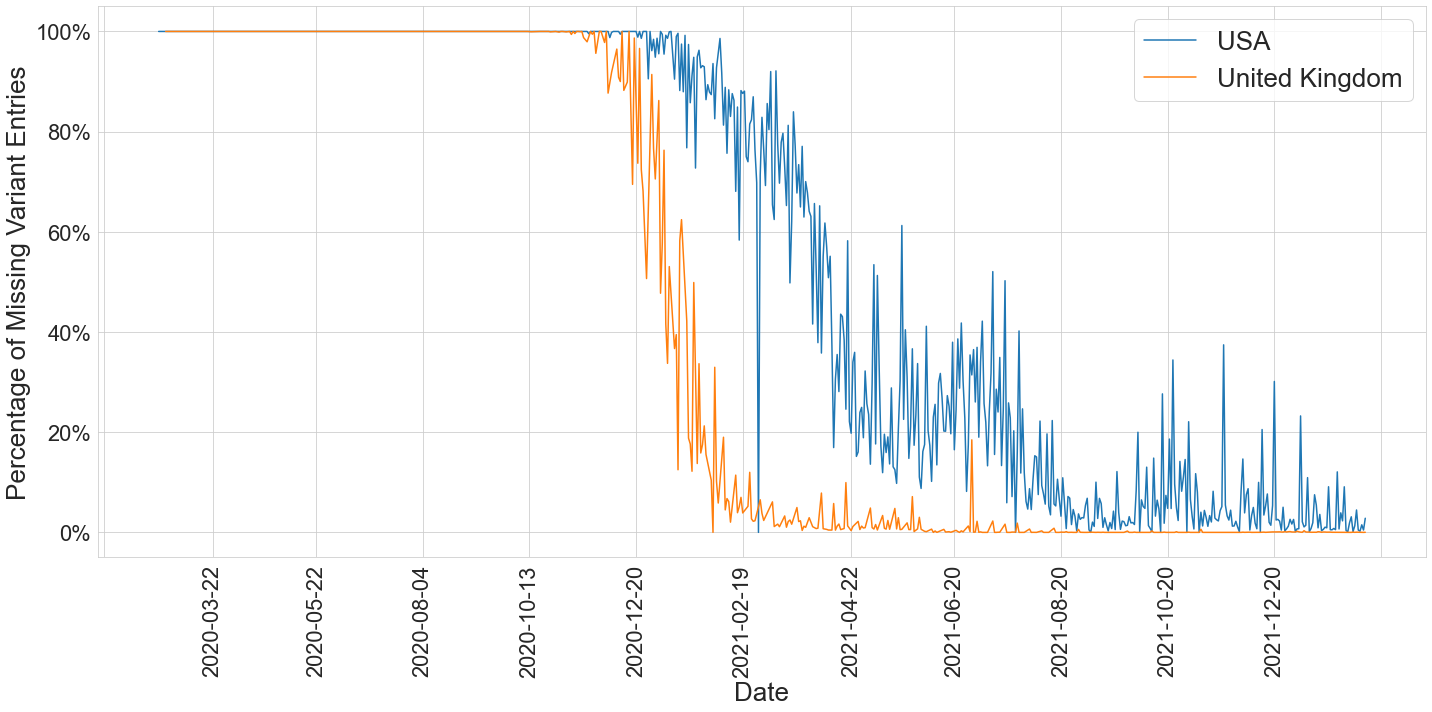

In [19]:
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import os
import seaborn as sns

COUNTRIES = ['United Kingdom', 'USA']
plotdata_reduced = plotdata[plotdata['country'].isin(COUNTRIES)]

# Create multi-line plot showing number of missing variant entries over time (one line per country)
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=plotdata_reduced.sort_values('covv_subm_date'),
             x='covv_subm_date',
             y='missing_variants_percentage',
             hue='country')

# Adjust text
#fig.suptitle('Percentage of Missing Variant Entries of Countries Over Time\n', fontsize=32)
plt.xlabel('Date', fontsize=26)
plt.ylabel('Percentage of Missing Variant Entries', fontsize=26)
plt.xticks(fontsize=22, rotation=90)
plt.yticks(fontsize=22)
plt.legend(loc='upper right', fontsize=26)

# Append percentage sign to y-values
ytick_fmt = mtick.PercentFormatter(xmax=100)
ax.yaxis.set_major_formatter(ytick_fmt)

# Only plot every second month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))

# Create subdirectory if needed
if not os.path.isdir('../../plots/GISAID/percentage_missing_variants_over_time'):
    os.mkdir('../../plots/GISAID/percentage_missing_variants_over_time')

plt.tight_layout()
plt.savefig(f'../../plots/GISAID/percentage_missing_variants_over_time/percentage_missing_variants_over_time_{"_".join(sorted(COUNTRIES))}.png', dpi=300)
#plt.close()

## Amount of Data over Time

In [148]:
# Show which time frame is covered
gisaid_metadata['covv_subm_date'] = pd.to_datetime(gisaid_metadata['covv_subm_date'])
print(f'Includes data from {str(gisaid_metadata["covv_subm_date"].min().date())} to {str(gisaid_metadata["covv_subm_date"].max().date())}')

Includes data from 2020-01-10 to 2022-02-10


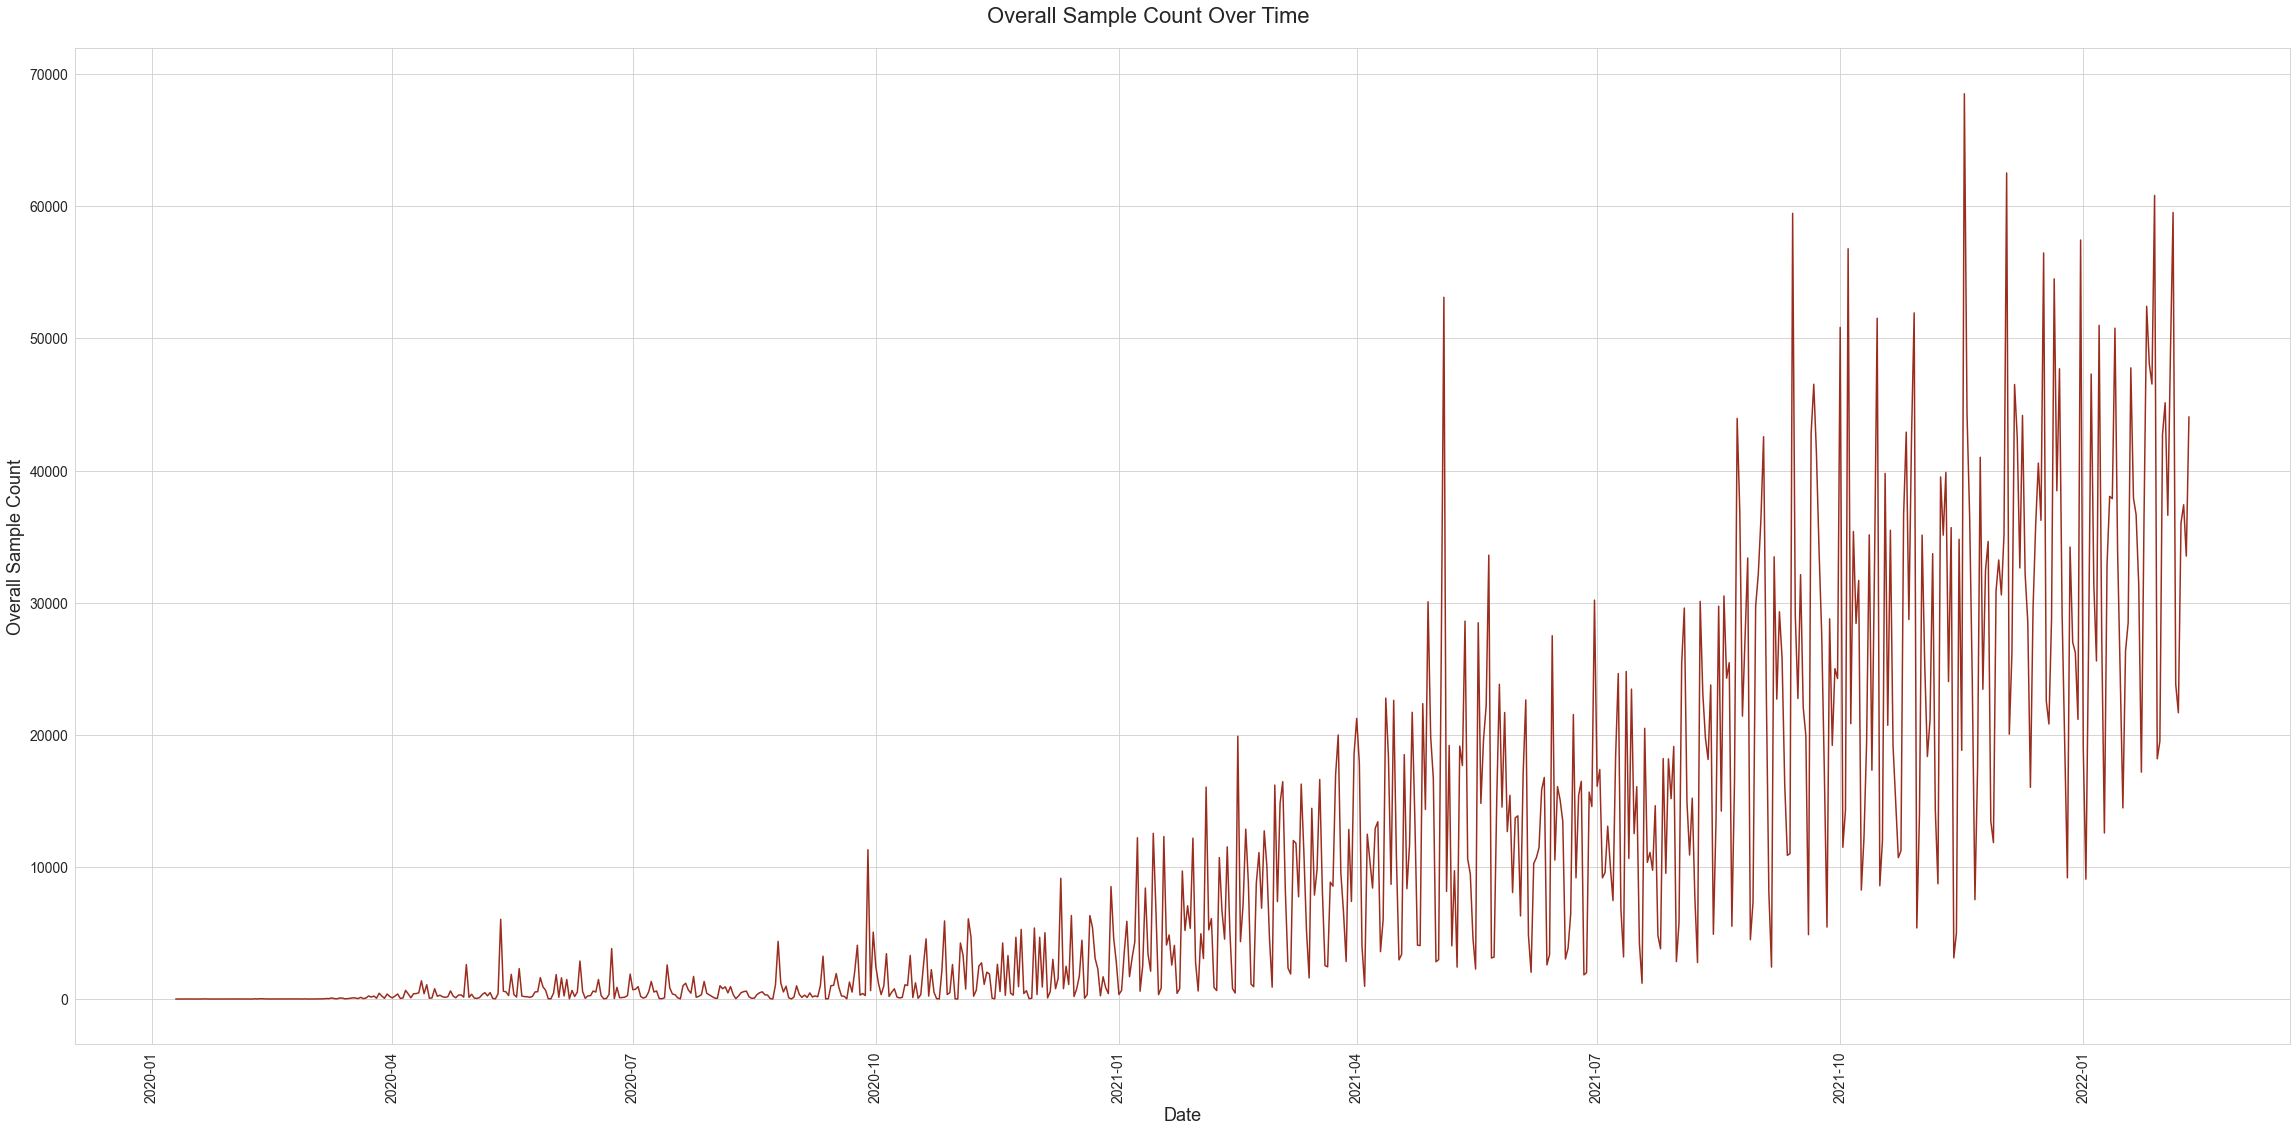

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create line plot with overall sample count over time
plotdata = gisaid_metadata.groupby(['covv_subm_date']).size().reset_index().rename(columns={0 : 'count'})

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(32, 16))
sns.lineplot(data=plotdata,
             x='covv_subm_date',
             y='count',
             color='#9B2D1F')

fig.suptitle('Overall Sample Count Over Time\n', fontsize=22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Overall Sample Count', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.savefig('../../plots/GISAID/overall_sample_count_over_time.png', dpi=300)
plt.close()

## Number of Samples Scaled by Number of Inhabitants per Country

Bar plot with sample count per country scaled by #inhabitants and color indicating GDP or HDI category.

In [37]:
# Reduce GISAID data to countries and their sample counts
plotdata = pd.DataFrame(gisaid_metadata['country'].value_counts().sort_index().reset_index())
plotdata.rename(columns={'index': 'country', 'country': 'count'}, inplace=True)
plotdata

country  count
0                  Afghanistan     99
1                      Albania     43
2                      Algeria     85
3               American Samoa     11
4                      Andorra     88
..                         ...    ...
205                  Venezuela    294
206                    Vietnam   2604
207  Wallis and Futuna Islands     10
208                     Zambia   1142
209                   Zimbabwe    933

[210 rows x 2 columns]

In [38]:
import json

with open('../helper_dicts/country_inhabitants.json') as f:
    country_inhabitants_map = json.load(f)

# Reduce 210 countries to 102 countries also known in map
plotdata = plotdata[plotdata['country'].isin(list(country_inhabitants_map.keys()))]
plotdata['country'].nunique()

102

In [39]:
# Get number of inhabitants column to scale sample counts
plotdata['n_inhabitants'] = [country_inhabitants_map[c] for c in plotdata['country']]
plotdata['count_scaled'] = plotdata['count'] / plotdata['n_inhabitants']
plotdata

country  count  n_inhabitants  count_scaled
8     Argentina  16611       45605826      0.000364
9       Armenia    194        2963900      0.000065
11    Australia  64287       25700000      0.002501
12      Austria  82960        8935112      0.009285
14      Bahrain   2271        1569446      0.001447
..          ...    ...            ...           ...
202     Uruguay    696        3518552      0.000198
203  Uzbekistan     51       35011180      0.000001
205   Venezuela    294       28887118      0.000010
208      Zambia   1142       17351708      0.000066
209    Zimbabwe    933       15092171      0.000062

[102 rows x 4 columns]

In [44]:
# GDP collected by OWID from Worldbank
# Source: https://ourworldindata.org/grapher/gdp-per-capita-worldbank
owid_gdp = pd.read_csv('../../data/OWID_gdp.csv')
owid_gdp.head()

Entity Code  Year  GDP per capita, PPP (constant 2017 international $)
0  Afghanistan  AFG  2002                                        1189.784668  
1  Afghanistan  AFG  2003                                        1235.810063  
2  Afghanistan  AFG  2004                                        1200.278013  
3  Afghanistan  AFG  2005                                        1286.793659  
4  Afghanistan  AFG  2006                                        1315.789117

In [45]:
# Filter for most recent year
gdp_reduced = owid_gdp[owid_gdp['Year'] == 2020]
# Rename columns for better usability
gdp_reduced = gdp_reduced.rename(columns={'Entity': 'Country', 'GDP per capita, PPP (constant 2017 international $)': 'GDP'})

gdp_reduced # 224 countries left

Country      Code  Year           GDP
18                    Afghanistan       AFG  2020   1978.961579
49    Africa Eastern and Southern       NaN  2020   3387.594670
80     Africa Western and Central       NaN  2020   4003.158913
111                       Albania       ALB  2020  13295.410885
142                       Algeria       DZA  2020  10681.679297
...                           ...       ...   ...           ...
6984                      Vanuatu       VUT  2020   2762.791388
7015                      Vietnam       VNM  2020   8200.331867
7046                        World  OWID_WRL  2020  16194.040310
7077                       Zambia       ZMB  2020   3270.035112
7108                     Zimbabwe       ZWE  2020   2744.690758

[224 rows x 4 columns]

In [ ]:
# Show countries listed in GDP data, but not in GISAID
set(gdp_reduced['Country']).difference(set(plotdata['country']))

In [ ]:
# Show countries listed in GISAID data, but not in GDP
set(plotdata['country']).difference(set(gdp_reduced['Country']))

In [46]:
# Map country names of GPD data to the ones of GISAID
gdp_reduced['Country'].replace(['United States', 'Timor', 'Czechia'], ['USA', 'Timor-Leste', 'Czech Republic'], inplace=True)

In [47]:
# Add GDP column
def add_gdp(country):
    if country in gdp_reduced['Country'].tolist():
        return gdp_reduced[gdp_reduced['Country'] == country]['GDP'].iloc[0]
    else:
        return 0  # not undefined for sorting later on

plotdata['GDP'] = plotdata.apply(lambda row: add_gdp(row['country']), axis=1)
plotdata

country    count  n_inhabitants  count_scaled  count_scaled_round  \
41            China     1540     1418120000      0.000001              0.0000   
203      Uzbekistan       51       35011180      0.000001              0.0000   
130         Myanmar      115       53582855      0.000002              0.0000   
175         Somalia       37       15893219      0.000002              0.0000   
117            Mali       74       20250833      0.000004              0.0000   
..              ...      ...            ...           ...                 ...   
183          Sweden   145439       10402070      0.013982              0.0140   
110   Liechtenstein      618          38896      0.015889              0.0159   
88          Iceland     9832         371580      0.026460              0.0265   
201  United Kingdom  2008235       67081000      0.029937              0.0299   
53          Denmark   349869        5850189      0.059805              0.0598   

              GDP  
41   16410.797797  
203   6994.169412  
130   4544.021569  
175    829.611429  
117   2216.773262  
..            ...  
183  50683.323510  
110      0.000000  
88   52279.728851  
201  41627.129269  
53   55938.212809  

[102 rows x 6 columns]

In [12]:
# Look into GDP value range to decide for GDP categories (used for bar colors)
plotdata['GDP'].describe()

count      102.000000
mean     21756.335002
std      20223.614297
min          0.000000
25%       4842.751398
50%      14076.642419
75%      36071.191031
max      93397.048802
Name: GDP, dtype: float64

In [208]:
def add_gdp_category(gdp):
    if gdp == 0: return 'unknown'
    elif 0 < gdp < 2000: return '(0, 2k)'
    elif 2000 <= gdp < 5000: return '[2k, 5k)'
    elif 5000 <= gdp < 10000: return '[5k, 10k)'
    elif 10000 <= gdp < 20000: return '[10k, 20k)'
    elif 20000 <= gdp < 35000: return '[20k, 35k)'
    elif 35000 <= gdp < 50000: return '[35k, 50k)'
    elif gdp >= 50000: return '[50k, inf)'

plotdata['GDP_category'] = plotdata.apply(lambda row: add_gdp_category(row['GDP']), axis=1)
plotdata['GDP_category'].value_counts()

[10k, 20k)    21
[2k, 5k)      18
[35k, 50k)    16
[20k, 35k)    15
[5k, 10k)     12
[50k, inf)    11
unknown        7
(0, 2k)        2
Name: GDP_category, dtype: int64

In [49]:
# HDI data from United Nations Development Programme (UNDP): https://hdr.undp.org/en/indicators/137506#
hdi = pd.read_csv('../../data/human_development_index.csv', encoding='ISO-8859-1', skiprows=5)

# Keep latest HDI
hdi_reduced = hdi[['Country', '2019']].rename(columns={'2019': 'HDI'})

# Remove white space at beginning of country names
hdi_reduced['Country'] = hdi_reduced['Country'].str.lstrip()

hdi_reduced

Country    HDI
0                                          Afghanistan  0.511
1                                              Albania  0.795
2                                              Algeria  0.748
3                                              Andorra  0.868
4                                               Angola  0.581
..                                                 ...    ...
202                          Least Developed Countries  0.538
203                     Small Island Developing States  0.728
204  Organization for Economic Co-operation and Dev...  0.900
205                                              World  0.737
206                                                NaN    NaN

[207 rows x 2 columns]

In [ ]:
# Show countries listed in HDI data, but not in GISAID
set(hdi_reduced['Country']).difference(set(plotdata['country']))

In [ ]:
# Show countries listed in GISAID data, but not in HDI
set(plotdata['country']).difference(set(hdi_reduced['Country']))

In [50]:
# Map country names of HDI data to the ones of GISAID
hdi_reduced['Country'].replace(['Czechia', 'Hong Kong, China (SAR)', 'Iran (Islamic Republic of)',
                                'Russian Federation', 'Korea (Republic of)', 'United States', 'Venezuela (Bolivarian Republic of)'],
                               ['Czech Republic', 'Hong Kong', 'Iran',
                                'Russia', 'South Korea', 'USA', 'Venezuela'],
                               inplace=True)

In [51]:
# Add HDI column
def add_hdi(country):
    if country in hdi_reduced['Country'].tolist():
        return hdi_reduced[hdi_reduced['Country'] == country]['HDI'].iloc[0]
    else:
        return 0  # not undefined for sorting later on

plotdata['HDI'] = plotdata.apply(lambda row: add_hdi(row['country']), axis=1)
plotdata['HDI'] = plotdata['HDI'].astype(float)
plotdata

country    count  n_inhabitants  count_scaled  count_scaled_round  \
41            China     1540     1418120000      0.000001              0.0000   
203      Uzbekistan       51       35011180      0.000001              0.0000   
130         Myanmar      115       53582855      0.000002              0.0000   
175         Somalia       37       15893219      0.000002              0.0000   
117            Mali       74       20250833      0.000004              0.0000   
..              ...      ...            ...           ...                 ...   
183          Sweden   145439       10402070      0.013982              0.0140   
110   Liechtenstein      618          38896      0.015889              0.0159   
88          Iceland     9832         371580      0.026460              0.0265   
201  United Kingdom  2008235       67081000      0.029937              0.0299   
53          Denmark   349869        5850189      0.059805              0.0598   

              GDP    HDI  
41   16410.797797  0.761  
203   6994.169412  0.720  
130   4544.021569  0.583  
175    829.611429      0  
117   2216.773262  0.434  
..            ...    ...  
183  50683.323510  0.945  
110      0.000000  0.919  
88   52279.728851  0.949  
201  41627.129269  0.932  
53   55938.212809  0.940  

[102 rows x 7 columns]

In [53]:
# HDI categories proposed by the United Nations Development Programme
# Source: http://hdr.undp.org/sites/default/files/2016_human_development_report.pdf
def add_hdi_category(hdi):
    if hdi == 0: return 'unknown'
    elif 0 < hdi < 0.55: return 'low'
    elif 0.55 <= hdi < 0.7: return 'medium'
    elif 0.7 <= hdi < 0.8: return 'high'
    elif hdi >= 0.8: return 'very high'

plotdata['HDI_category'] = plotdata.apply(lambda row: add_hdi_category(float(row['HDI'])), axis=1)
plotdata

country    count  n_inhabitants  count_scaled  \
175             Somalia       37       15893219      0.000002   
186              Taiwan      274       23451837      0.000012   
79                 Guam      531         168801      0.003146   
152         Puerto Rico     6496        3285874      0.001977   
117                Mali       74       20250833      0.000004   
168        Sierra Leone       61        8059155      0.000008   
81               Guinea      419       12414293      0.000034   
63             Ethiopia      516      117876227      0.000004   
71               Gambia     1140        2173999      0.000524   
191                Togo      362        8608444      0.000042   
54             Djibouti      525         921804      0.000570   
137             Nigeria     4770      211400708      0.000023   
198              Uganda      987       42729036      0.000023   
20                Benin      780       11733059      0.000066   
142            Pakistan     1774      226992332      0.000008   
34             Cameroon      594       26545864      0.000022   
209            Zimbabwe      933       15092171      0.000062   
130             Myanmar      115       53582855      0.000002   
208              Zambia     1142       17351708      0.000066   
33             Cambodia     2433       15552211      0.000156   
100               Kenya     5939       54985698      0.000108   
132               Nepal     1150       28095714      0.000041   
190         Timor-Leste      356        1340513      0.000266   
74                Ghana     2424       31072940      0.000078   
15           Bangladesh     4559      164700000      0.000028   
89                India   129232     1352642280      0.000096   
80            Guatemala     1532       17263239      0.000089   
92                 Iraq      459       40222503      0.000011   
128             Morocco      661       37112080      0.000018   
70                Gabon      662        2119275      0.000312   
58                Egypt     1869      101478581      0.000018   
176        South Africa    30274       60142978      0.000503   
205           Venezuela      294       28887118      0.000010   
19               Belize      514         419199      0.001226   
149         Philippines    14140      109035343      0.000130   
90            Indonesia    17982      270203917      0.000067   
203          Uzbekistan       51       35011180      0.000001   
109               Libya       56        6992701      0.000008   
98               Jordan     1345       11042719      0.000122   
96              Jamaica      558        2726667      0.000205   
193             Tunisia      316       11708370      0.000027   
106             Lebanon     1198        6859408      0.000175   
56   Dominican Republic     1073       10878246      0.000099   
57              Ecuador     4168       17715822      0.000235   
41                China     1540     1418120000      0.000001   
26               Brazil   109255      210147125      0.000520   
42             Colombia    14157       50372424      0.000281   
9               Armenia      194        2963900      0.000065   
188            Thailand    14761       69950850      0.000211   
148                Peru    15165       34294231      0.000442   
122              Mexico    50565      126014024      0.000401   
180           Sri Lanka     3008       22156000      0.000136   
91                 Iran     1310       83183741      0.000016   
48                 Cuba     1170       11181595      0.000105   
167          Seychelles      750          98462      0.007617   
166              Serbia      689        6871547      0.000100   
115            Malaysia     9012       32730000      0.000275   
72              Georgia     1261       10620000      0.000119   
202             Uruguay      696        3518552      0.000198   
194              Turkey    84180       83614362      0.001007   
17              Belarus      194        9349645    

In [ ]:
# Export part of plotdata for appendix of seminar report
#plotdata = plotdata.sort_values(by='count_scaled')
#plotdata[['country', 'count_scaled']].to_csv('../../data/scaled_country_counts_and_hdi.csv', index=False, float_format='%.6f')

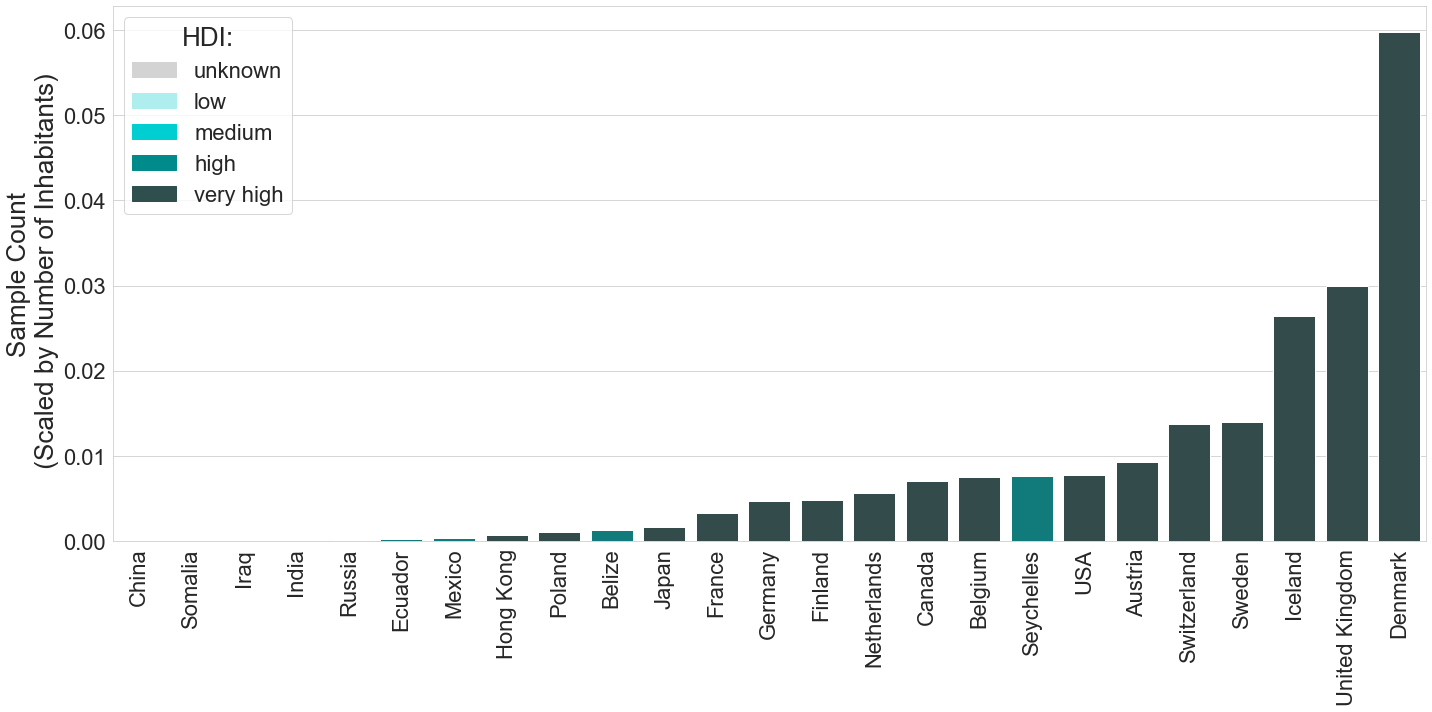

In [247]:
from matplotlib import rcParams
plt.rcParams['legend.title_fontsize'] = 26

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

# Define countries to be keep
COUNTRIES_TO_KEEP = ['USA', 'United Kingdom', 'Germany', 'Denmark', 'China', 'India', 'Japan', 'France', 'Sweden', 'Switzerland', 'Hong Kong', 'Austria', 'Netherlands', 'Canada', 'Belgium', 'Finland', 'Iceland', 'Russia', 'Somalia', 'Mexico', 'Iraq', 'Poland', 'Ecuador', 'Seychelles', 'Belize']

# Color by GDP or HDI
HDI_COLORED = True

# Apply reduction of plotdata and sort by scaled count
plotdata_reduced = plotdata[plotdata['country'].isin(COUNTRIES_TO_KEEP)]
plotdata_reduced = plotdata_reduced.sort_values(by='count_scaled')

# The higher the GDP or HDI (aka the richer the country), the darker the bar color
hdi_colors = {
    'unknown'       :   'lightgray',
    'low'           :   'paleturquoise',
    'medium'        :   'darkturquoise',
    'high'          :   'darkcyan',
    'very high'     :   'darkslategrey'
}

gdp_colors = {
    'unknown'       :   'lightgray',
    '(0, 2k)'       :   'gold',
    '[2k, 5k)'      :   'darkorange',
    '[5k, 10k)'     :   'crimson',
    '[10k, 20k)'    :   'darkviolet',
    '[20k, 35k)'    :   'steelblue',
    '[35k, 50k)'    :   'mediumblue',
    '[50k, inf)'    :   'black'
}

if HDI_COLORED:
    custom_palette = [hdi_colors[hdi_cat] for hdi_cat in plotdata_reduced['HDI_category']]
else:
    custom_palette = [gdp_colors[gdp_cat] for gdp_cat in plotdata_reduced['GDP_category']]

# Create barplot with scaled sample count per country, and colored bars according to GDP or HDI
sns.set_style('whitegrid')
fig, _ = plt.subplots(figsize=(20, 10))
sns.barplot(data=plotdata_reduced,
            x='country',
            y='count_scaled',
            palette=custom_palette)

# Adjust texts
#fig.suptitle('GDP and Number of Samples per Country\n (Scaled by Number of Inhabitants)', fontsize=32)
plt.xlabel('')
plt.ylabel('Sample Count\n (Scaled by Number of Inhabitants)', fontsize=26)
plt.xticks(fontsize=22, rotation=90)
plt.yticks(fontsize=22)

# Add custom legend for GDP or HDI categories
handles = list()
if HDI_COLORED:
    for hdi_cat, color in hdi_colors.items():
        handles.append(mpatches.Patch(color=color, label=hdi_cat))
else:
    for gdp_cat, color in gdp_colors.items():
        handles.append(mpatches.Patch(color=color, label=gdp_cat))

plt.legend(title=f'{"HDI" if HDI_COLORED else "GDP per Capita"}:', handles=handles, fontsize=22)

# Create subdirectory if needed
if not os.path.isdir(f'../../plots/GISAID/{"hdi" if HDI_COLORED else "gdp"}'):
    os.mkdir(f'../../plots/GISAID/{"hdi" if HDI_COLORED else "gdp"}')

plt.tight_layout()
plt.savefig(f'../../plots/GISAID/{"hdi" if HDI_COLORED else "gdp"}/'
            f'country_counts_scaled_by_nr_inhabitants_colored_by_{"HDI" if HDI_COLORED else "GDP"}.png', dpi=300)
#plt.close()

In [72]:
plotdata.loc[plotdata['count_scaled'].idxmax()] # Denmark with ~350k samples

country               Denmark
count                  349869
n_inhabitants         5850189
count_scaled         0.059805
GDP              55938.212809
GDP_category       [50k, inf)
Name: 53, dtype: object

In [73]:
plotdata.loc[plotdata['count_scaled'].idxmin()] # China with 1,540 samples

country                 China
count                    1540
n_inhabitants      1418120000
count_scaled         0.000001
GDP              16410.797797
GDP_category       [10k, 20k)
Name: 41, dtype: object

## Absolute Number of Samples per Country



In [ ]:
# Reduce GISAID data to countries and their sample counts
plotdata = pd.DataFrame(gisaid_metadata['country'].value_counts().sort_index().reset_index())
plotdata.rename(columns={'index': 'country', 'country': 'count'}, inplace=True)
plotdata

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove USA + UK and sort by absolute count
plotdata_reduced = plotdata[~plotdata['country'].isin(['USA', 'United Kingdom'])]
plotdata_reduced = plotdata_reduced.sort_values(by='count')

# Create barplot with sample count per country
sns.set_style('whitegrid')
fig, _ = plt.subplots(figsize=(30, 15))
sns.barplot(data=plotdata_reduced,
            x='country',
            y='count',
            color='#9B2D1F')

# Adjust texts
#fig.suptitle('Number of Samples per Country', fontsize=26)
plt.xlabel('Country', fontsize=24)
plt.ylabel('Sample Count', fontsize=24)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.savefig(f'../../plots/GISAID/country_counts.png', dpi=300)
plt.close()

In [75]:
plotdata['count'].describe()

count    1.020000e+02
mean     7.589625e+04
std      3.252719e+05
min      2.000000e+00
25%      6.612500e+02
50%      2.720500e+03
75%      2.422900e+04
max      2.582489e+06
Name: count, dtype: float64

## Number of Samples Scaled by Number of Inhabitants over Time

Line plot showing monthly number of samples divided by number of inhabitants for each selected country as single line.

In [110]:
import json

with open('../helper_dicts/country_inhabitants.json') as f:
    country_inhabitants_map = json.load(f)

In [164]:
# Extract month
gisaid_metadata['month_year'] = pd.to_datetime(gisaid_metadata['covv_subm_date']).dt.to_period('M')

# Get sample count per country and month
plotdata = gisaid_metadata.groupby(['country', 'month_year']).size().reset_index().rename(columns={0 : 'count'})

# Reduce countries to countries known in inhabitants map
plotdata = plotdata[plotdata['country'].isin(list(country_inhabitants_map.keys()))]
plotdata

country month_year  count
53    Argentina    2020-04     29
54    Argentina    2020-06      8
55    Argentina    2020-07      1
56    Argentina    2020-11     12
57    Argentina    2021-01    611
...         ...        ...    ...
2530   Zimbabwe    2021-06    160
2531   Zimbabwe    2021-08     98
2532   Zimbabwe    2021-11     51
2533   Zimbabwe    2022-01    219
2534   Zimbabwe    2022-02      4

[1659 rows x 3 columns]

In [165]:
# Scale count
def scale_count(row):
    return row['count'] / country_inhabitants_map[row['country']]

plotdata['count_scaled'] = plotdata.apply(lambda row: scale_count(row), axis=1)
plotdata

country month_year  count  count_scaled
53    Argentina    2020-04     29  6.358837e-07
54    Argentina    2020-06      8  1.754162e-07
55    Argentina    2020-07      1  2.192702e-08
56    Argentina    2020-11     12  2.631243e-07
57    Argentina    2021-01    611  1.339741e-05
...         ...        ...    ...           ...
2530   Zimbabwe    2021-06    160  1.060152e-05
2531   Zimbabwe    2021-08     98  6.493433e-06
2532   Zimbabwe    2021-11     51  3.379235e-06
2533   Zimbabwe    2022-01    219  1.451083e-05
2534   Zimbabwe    2022-02      4  2.650381e-07

[1659 rows x 4 columns]

In [168]:
# Set dtype
plotdata['month_year'] = plotdata['month_year'].astype('str')

# Set order
plotdata['month_year'] = pd.Categorical(plotdata['month_year'],
                                        categories=sorted(plotdata['month_year'].unique()),
                                        ordered=True)

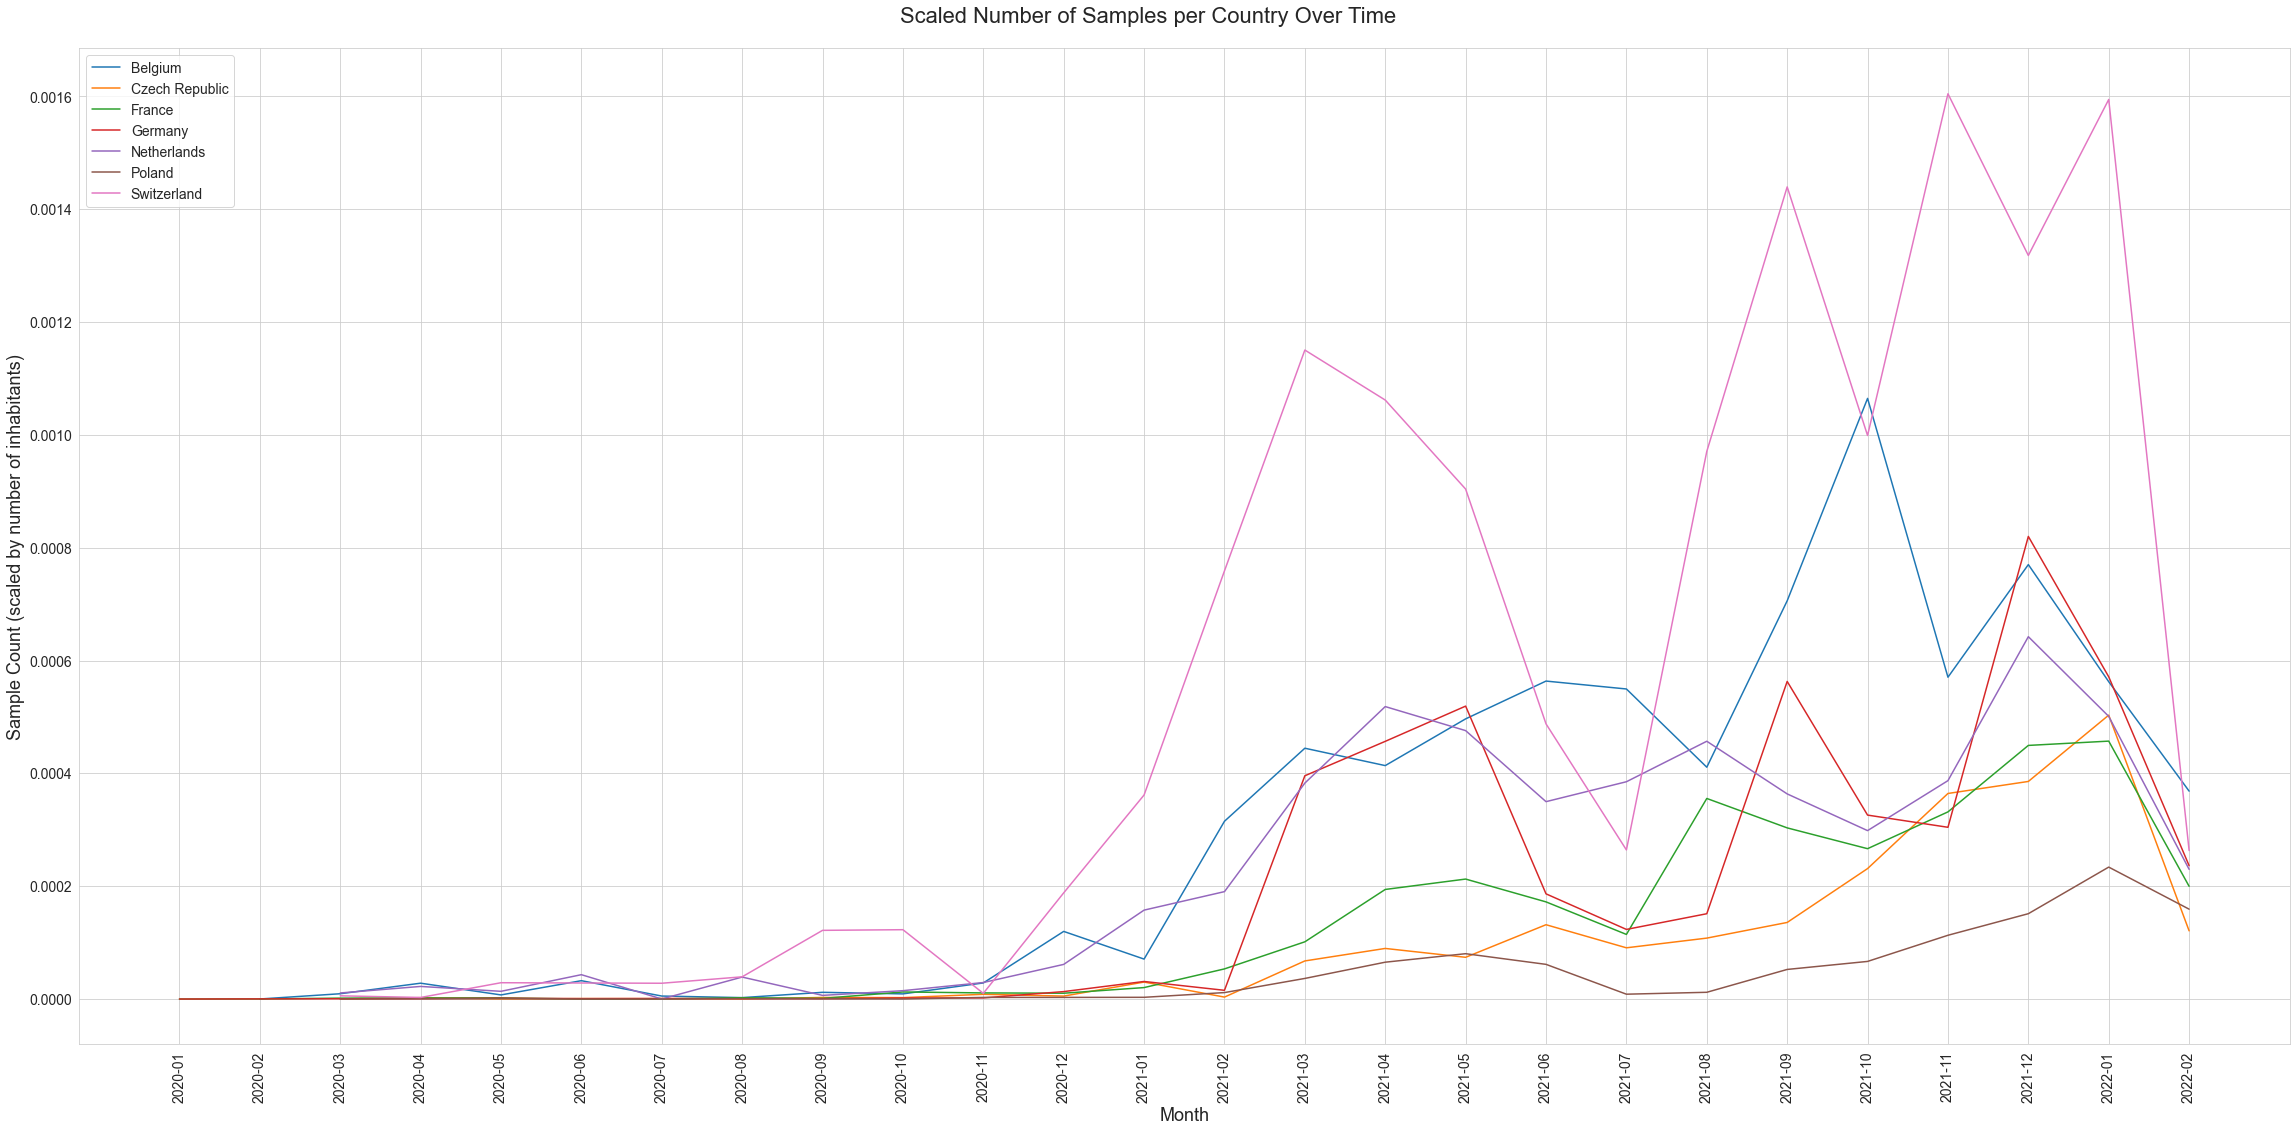

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust countries to show (currently neighbouring countries of Germany are selected)
# Denmark and Austria were excluded, as their values distort data of other countries too much
# Luxembourg is not available in GISAID data & json map
COUNTRIES = ['Germany', 'Poland', 'Czech Republic', 'Switzerland', 'France', 'Belgium', 'Netherlands']

plotdata_reduced = plotdata[plotdata['country'].isin(COUNTRIES)]

# Per country and month, create line with sample count scaled by number of inhabitants
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(32, 16))

sns.lineplot(data=plotdata_reduced,
             x='month_year',
             y='count_scaled',
             hue='country')

fig.suptitle('Scaled Number of Samples per Country Over Time\n', fontsize=22)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Sample Count\n (Scaled by Number of Inhabitants)', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=14)

plt.tight_layout()
plt.savefig('../../plots/GISAID/country_counts_over_time_scaled_by_nr_inhabitants.png', dpi=300)
plt.close()

## Current Percentage of Virus Variants for Selected Country

Multi-bar plot with countries on x-axis, virus variants as hue and #variant/#samples on y-axis.

In [137]:
plotdata = gisaid_metadata.copy(deep=True)

In [138]:
# Prepare helper data for plots
country_counts = pd.DataFrame(plotdata['country'].value_counts().sort_index().reset_index())
country_counts.rename(columns={'index': 'country', 'country': 'count'}, inplace=True)
country_counts

country  count
0                  Afghanistan     99
1                      Albania     43
2                      Algeria     85
3               American Samoa     11
4                      Andorra     88
..                         ...    ...
205                  Venezuela    294
206                    Vietnam   2604
207  Wallis and Futuna Islands     10
208                     Zambia   1142
209                   Zimbabwe    933

[210 rows x 2 columns]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust which countries and variants to include
COUNTRIES = ['USA', 'United Kingdom', 'Germany', 'Denmark', 'Canada']
VARIANT_TYPE = 'VOC'
VARIANTS = plotdata['variant_WHO_label'].unique()

plotdata_reduced = plotdata[plotdata['country'].isin(COUNTRIES)]
plotdata_reduced['covv_variant'] = plotdata_reduced['covv_variant'].astype(str)
plotdata_reduced = plotdata_reduced[(plotdata_reduced['covv_variant'].str.contains(VARIANT_TYPE)) & (plotdata_reduced['variant_WHO_label'].isin(VARIANTS))]

# Create multi-bar countplot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(22, 16))
sns.countplot(data=plotdata_reduced,
              x='country',
              hue='variant_WHO_label',
              hue_order=sorted(plotdata_reduced['variant_WHO_label'].unique()),
              order=COUNTRIES)

fig.suptitle('Current Scaled Count of Virus Variants per Country\n', fontsize=22)
plt.xlabel('Country', fontsize=18)
plt.ylabel('Count of Virus Variants\n (Scaled by Number of Samples)', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', title='Virus Variant:', fontsize=14)
plt.rcParams['legend.title_fontsize'] = 14

# Scale height of bars with number of samples per country
max_y = 0
for i, bar in enumerate(ax.patches):
    country = ax.get_xticklabels()[i % len(COUNTRIES)].get_text()
    new_height = bar.get_height() / country_counts[country_counts['country'] == country]['count'].iloc[0]
    bar.set_height(new_height)

    max_y = max(max_y, new_height)
plt.gca().set_ylim([0, max_y + (max_y / 20)])

plt.tight_layout()
plt.savefig('../../plots/GISAID/virus_variant_counts_scaled_by_nr_sequences.png', dpi=300)
plt.close()

## Percentage of Virus Variants for Selected Countries Over Time

Multi-line time series plot with variant percentages (#variant/#samples) on y-axis, one line color per country and one marker per variant. In addition, if only one country is selected, its absolute number of samples can be added as a black line (introducing a second y-axis).

In [2]:
gisaid_metadata['covv_subm_date'] = pd.to_datetime(gisaid_metadata['covv_subm_date'])

In [3]:
country_date_counts = gisaid_metadata.groupby(['country', 'covv_subm_date']).size().reset_index()
country_date_counts.rename(columns={0 : 'samples'}, inplace=True)

country_variant_counts = gisaid_metadata.groupby(['country', 'covv_subm_date', 'variant_WHO_label']).size().reset_index()
country_variant_counts.rename(columns={0 : 'samples_per_variant'}, inplace=True)

plotdata = pd.merge(country_date_counts, country_variant_counts, on=['country', 'covv_subm_date'])
plotdata['relative_samples_per_variant'] = plotdata['samples_per_variant'] / plotdata['samples']
plotdata

country covv_subm_date  samples variant_WHO_label  \
0      Afghanistan     2021-02-15        7           Unknown   
1      Afghanistan     2021-02-19        6           Unknown   
2      Afghanistan     2021-02-22        3           Unknown   
3      Afghanistan     2021-09-29       83             Alpha   
4      Afghanistan     2021-09-29       83             Delta   
...            ...            ...      ...               ...   
35334     Zimbabwe     2022-01-18       32           Omicron   
35335     Zimbabwe     2022-01-18       32           Unknown   
35336     Zimbabwe     2022-01-27       22           Omicron   
35337     Zimbabwe     2022-01-27       22           Unknown   
35338     Zimbabwe     2022-02-02        4           Omicron   

       samples_per_variant  relative_samples_per_variant  
0                        7                      1.000000  
1                        6                      1.000000  
2                        3                      1.000000  
3                       55                      0.662651  
4                       20                      0.240964  
...                    ...                           ...  
35334                   30                      0.937500  
35335                    1                      0.031250  
35336                   21                      0.954545  
35337                    1                      0.045455  
35338                    4                      1.000000  

[35339 rows x 6 columns]

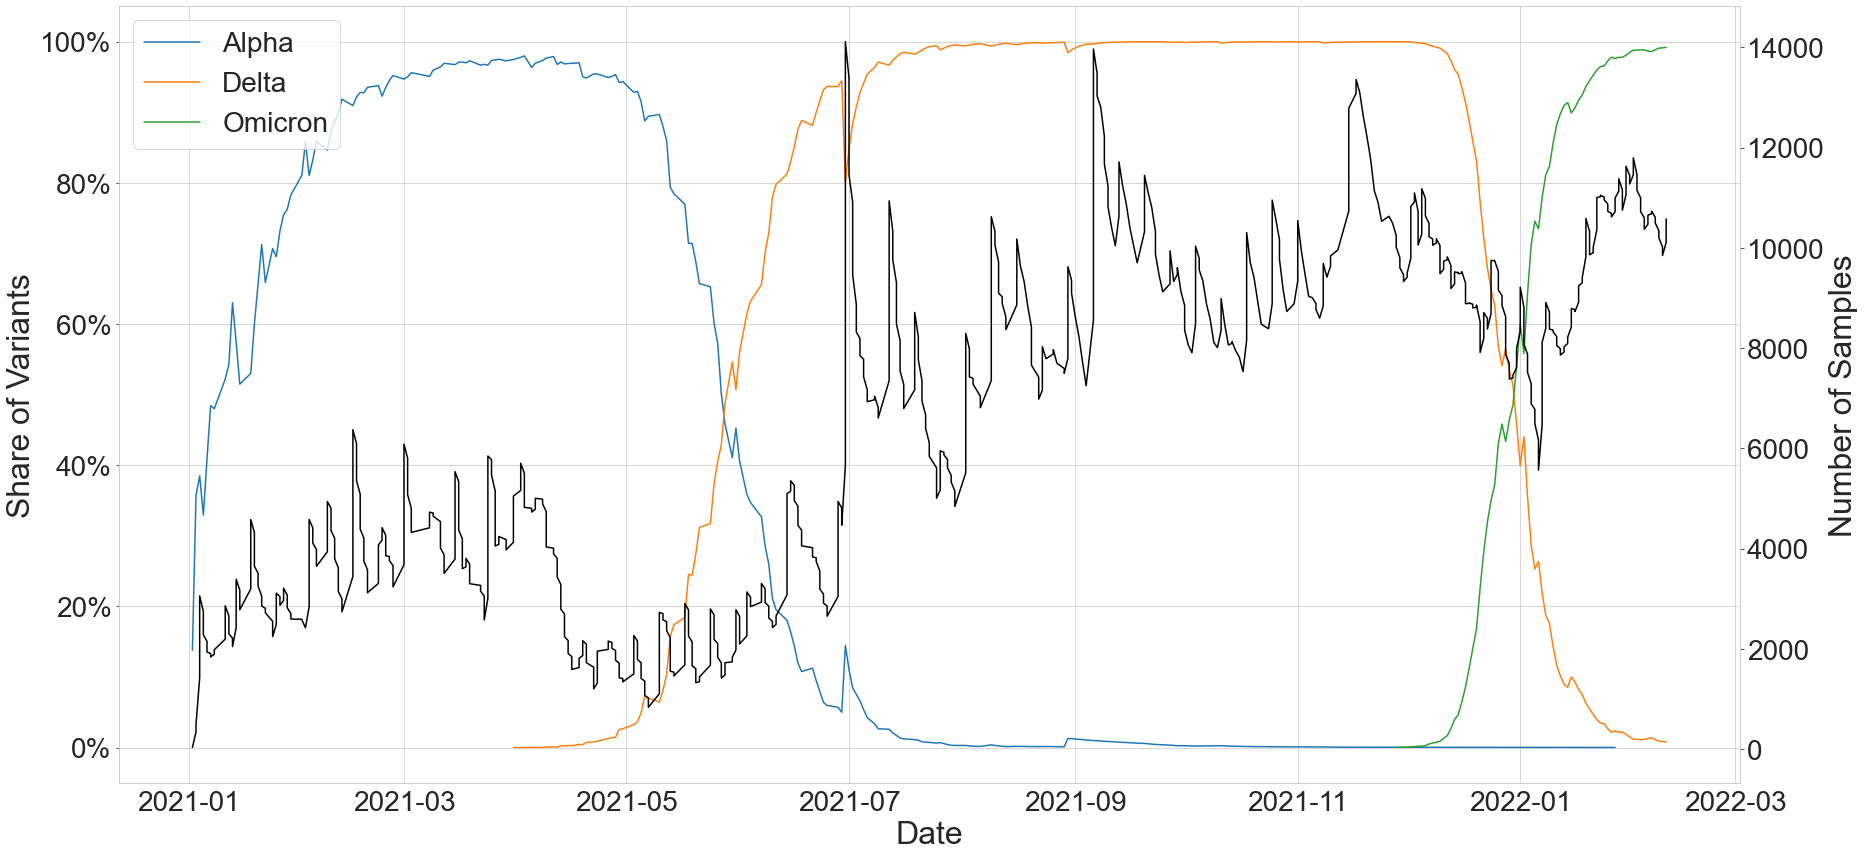

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import os
import seaborn as sns

# Adjust which countries and virus variants to include
COUNTRIES = ['United Kingdom']
VARIANTS = ['Alpha', 'Delta', 'Omicron']

# Decide how many days to average (e.g., 14 meaning average values in a bi-weekly manner)
DAYS_TO_AVERAGE = 14

# Decide whether sample count line should be added
SAMPLE_COUNT = True

# Avoid crowded plot
if SAMPLE_COUNT and len(COUNTRIES) > 1:
    raise ValueError('If sample count line should be drawn, only one country is allowed to be selected')

# Adjust which timeframe to look at
START_DATE = '2021-01-01' # plotdata['covv_subm_date'].min()
END_DATE = plotdata['covv_subm_date'].max()
plotdata_reduced = plotdata[(plotdata['covv_subm_date'] >= START_DATE) & (plotdata['covv_subm_date'] <= END_DATE)]

# Define colors for virus variants
COLORS = sns.color_palette('tab10')
if len(VARIANTS) > len(COLORS):
    raise ValueError(f'Please define at most {len(COLORS)} variants!')

# Define line styles for countries
STYLES = ['solid', 'dashed', 'dotted']
if len(COUNTRIES) > len(STYLES):
    raise ValueError(f'Please define at most {len(STYLES)} countries!')

# Generate line per country-variant combination showing daily #variants/#samples over time
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(26, 12))
for country_idx, country in enumerate(COUNTRIES):
    for variant_idx, variant in enumerate(VARIANTS):
        current_plotdata = plotdata_reduced[(plotdata_reduced['country'] == country) & (plotdata_reduced['variant_WHO_label'] == variant)].sort_values('covv_subm_date')
        ax.plot(current_plotdata['covv_subm_date'], current_plotdata['relative_samples_per_variant'].ewm(span=DAYS_TO_AVERAGE).mean(), ls=STYLES[country_idx], color=COLORS[variant_idx])

if not SAMPLE_COUNT:
    # Add legend for countries
    for country_idx, country in enumerate(COUNTRIES):
        ax.plot(np.nan, np.nan, ls=STYLES[country_idx], label=country, color='black')
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=28)  # upper legend

    # Add legend for virus variants
    ax2 = ax.twinx()
    for variant_idx, variant in enumerate(VARIANTS):
        ax2.plot(np.nan, np.nan, color=COLORS[variant_idx], label=variant)
    ax2.get_yaxis().set_visible(False)
    ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0), fontsize=28)  # lower legend
else:
    # Add legend for virus variants
    # (Legend for countries not needed as only one country is allowed if sample count line should be plotted)
    ax2 = ax.twinx()
    for variant_idx, variant in enumerate(VARIANTS):
        ax2.plot(np.nan, np.nan, color=COLORS[variant_idx], label=variant)
    ax2.legend(loc='upper left', fontsize=28)  # legend inside plot

    # Adjust second y-axis
    ax2.set_ylabel('Number of Samples', fontsize=32)
    ax2.tick_params(axis='both', which='major', labelsize=28)

    # Add black line for sample count of selected country
    country_data = plotdata_reduced[plotdata_reduced['country'] == COUNTRIES[0]].sort_values('covv_subm_date')
    ax2.plot(country_data['covv_subm_date'], country_data['samples'].ewm(span=DAYS_TO_AVERAGE).mean(), ls='solid', color='black')

# Adjust text
#fig.suptitle('Share of Virus Variants per Country Over Time', fontsize=36)
ax.set_xlabel('Date', fontsize=32)
ax.set_ylabel('Share of Variants', fontsize=32)
ax.tick_params(axis='both', which='major', labelsize=28)

# Convert y-values ranging from 0 to 1 to percentages
yticks_percentages = mtick.PercentFormatter(xmax=1)
ax.yaxis.set_major_formatter(yticks_percentages)

# Remove conflicting gridlines
ax2.grid(None)

# Create subdirectory if needed
if not os.path.isdir('../../plots/GISAID/variant_shares_over_time'):
    os.mkdir('../../plots/GISAID/variant_shares_over_time')

# Optimize layout and save plot
fig.tight_layout()
fig.savefig(f'../../plots/GISAID/variant_shares_over_time/variant_shares_over_time'
            f'#{"_".join(sorted(VARIANTS))}'
            f'#{"_".join(sorted(COUNTRIES))}'
            f'#{START_DATE if type(START_DATE) == str else str(START_DATE.date())}'
            f'#{END_DATE if type(END_DATE) == str else str(END_DATE.date())}'
            f'_{"withSampleCount" if SAMPLE_COUNT else ""}.png', dpi=300)
#plt.close()

## Laboratory & Federal State Shares in Germany

In [173]:
germany = gisaid_metadata[gisaid_metadata['country'] == 'Germany']
germany['covv_orig_lab'].value_counts(normalize=True).mul(100)

SYNLAB MVZ Leverkusen                                                                                                                                                                                                        9.562897
SYNLAB MVZ Leinfelden-Echterdingen                                                                                                                                                                                           7.719284
Bioscientia Labor Wermsdorf                                                                                                                                                                                                  5.196955
LADR Zentrallabor DR. Kramer & Kollegen Geesthacht                                                                                                                                                                           3.215817
MVZ Labor Dr. Limbach & Kollegen GbR                                            

In [176]:
# Extract federal states of Germany
# Location has continent (index 0), country (index 1) & region (index 2)
germany['federal_state'] = germany['covv_location'].apply(lambda loc: loc.split('/')[2].strip() if len(loc.split('/')) >= 3 else np.nan)
germany['federal_state'].value_counts(normalize=True).mul(100)

North Rhine-Westphalia           27.012036
Baden-Wurttemberg                18.585814
Bavaria                          12.160105
Saxony                            9.233556
Hamburg                           5.476897
Rhineland-Palatinate              4.033183
Schleswig-Holstein                3.923323
Hesse                             3.750228
Berlin                            3.722361
Lower Saxony                      2.540166
Saxony-Anhalt                     2.468087
Thuringia                         2.292312
Brandenburg                       1.622973
Saarland                          1.471045
Bremen                            1.120031
Mecklenburg-Western Pomerania     0.587882
Name: bundesland, dtype: float64

## Sequenced Percentage of Infections per Country Over Time

Per country, generate one time series plot showing which percentage of cases was sequenced (#samples / #infections) over time.

In [27]:
country_cumulative_infections = pd.read_csv('../../data/JHU_countries_time_series.csv')
country_cumulative_infections.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/3/22  2/4/22  2/5/22  2/6/22  \
0        0        0        0        0  ...  164727  165358  165711  166191   
1        0        0        0        0  ...  261240  263172  263172  264624   
2        0        0        0        0  ...  255836  256806  257598  257976   
3        0        0        0        0  ...   36470   36599   36599   36599   
4        0        0        0        0  ...   98319   98340   98351   98364   

   2/7/22  2/8/22  2/9/22  2/10/22  2/11/22  2/12/22  
0  166924  167739  168550   169448   169940   170152  
1  264875  265716  266416   267020   267020   267551  
2  258478  259088  259673   260191   260723   261226  
3   36808   36808   36989    37074    37140    37140  
4   98409   98424   98453    98474    98501    98514  

[5 rows x 757 columns]

In [28]:
# Get number of new infections from cumulative number of infections
# -> Can also be directly downloaded on https://github.com/owid/covid-19-data/blob/master/public/data/jhu/new_cases.csv
# -> This is the already converted version of the JHU data by OWID, so it has another format!
country_new_infections = country_cumulative_infections[['Country/Region']].copy()

for i, col in enumerate(country_cumulative_infections.columns[5:]):
    country_new_infections[col] = country_cumulative_infections[col] - country_cumulative_infections.iloc[:, i+4]

country_new_infections[country_new_infections['Country/Region'] == 'Germany']

Country/Region  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
135        Germany        0        0        0        0        1        3   

     1/29/20  1/30/20  1/31/20  ...  2/3/22  2/4/22  2/5/22  2/6/22  2/7/22  \
135        0        0        1  ...  248652  214386  127116   82363   51377   

     2/8/22  2/9/22  2/10/22  2/11/22  2/12/22  
135  380632  252813   236080   206242   116810  

[1 rows x 753 columns]

In [ ]:
countries_JHU = country_new_infections['Country/Region'].unique()
countries_GISAID = gisaid_metadata['country'].unique()

# Missing countries of GISAID metadata
list(set(countries_GISAID) - set(countries_JHU))

In [ ]:
# Missing countries of JHU metadata
list(set(countries_JHU) - set(countries_GISAID))

In [30]:
# Rename countries to GISAID naming schema
country_new_infections['Country/Region'] = country_new_infections['Country/Region']\
    .replace(['Korea, South', 'West Bank and Gaza', 'US', 'Samoa', 'Congo (Kinshasa)', 'Congo (Brazzaville)', 'Bahamas'],
             ['South Korea', 'West Bank', 'USA', 'American Samoa', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'The Bahamas'])

In [31]:
# Get sample count per country and date
plotdata = gisaid_metadata.groupby(['country', 'covv_subm_date']).size().reset_index().rename(columns={0: 'count'})

# Reduce GISAID countries to countries known in infection data
plotdata = plotdata[plotdata['country'].isin(country_new_infections['Country/Region'].unique())]
plotdata

country covv_subm_date  count
0      Afghanistan     2021-02-15      7
1      Afghanistan     2021-02-19      6
2      Afghanistan     2021-02-22      3
3      Afghanistan     2021-09-29     83
4          Albania     2021-01-14      1
...            ...            ...    ...
14649     Zimbabwe     2021-11-29      2
14650     Zimbabwe     2022-01-11    165
14651     Zimbabwe     2022-01-18     32
14652     Zimbabwe     2022-01-27     22
14653     Zimbabwe     2022-02-02      4

[13267 rows x 3 columns]

In [32]:
# Calculate which percentage of cases was sequenced
def scale_count(row):
    date_col = row['covv_subm_date'].strftime('%#m/%#d/%#y')

    if date_col in country_new_infections.columns:
        country_infections = country_new_infections[country_new_infections['Country/Region'] == row['country']]
        # Use sum() as some countries are listed several times in JHU data
        return row['count'] / country_infections[date_col].sum()

    else:
        return np.nan

plotdata['count_scaled'] = plotdata.apply(lambda row: scale_count(row), axis=1)
plotdata['infections'] = plotdata['count'] / plotdata['count_scaled']
plotdata

country covv_subm_date  count  count_scaled  infections
0      Afghanistan     2021-02-15      7      0.318182        22.0
1      Afghanistan     2021-02-19      6      0.333333        18.0
2      Afghanistan     2021-02-22      3      0.230769        13.0
3      Afghanistan     2021-09-29     83      2.371429        35.0
4          Albania     2021-01-14      1      0.001515       660.0
...            ...            ...    ...           ...         ...
14649     Zimbabwe     2021-11-29      2      0.007273       275.0
14650     Zimbabwe     2022-01-11    165           inf         0.0
14651     Zimbabwe     2022-01-18     32           inf         0.0
14652     Zimbabwe     2022-01-27     22      0.143791       153.0
14653     Zimbabwe     2022-02-02      4      0.024845       161.0

[13267 rows x 5 columns]

In [33]:
# Remove rows with scaled count of NaN, inf, > 1 or < 0
print(len(plotdata))
plotdata_clean = plotdata[(~plotdata['count_scaled'].isin([np.nan, np.inf, -np.inf])) & (plotdata['count_scaled'].between(0, 1))]
print(len(plotdata_clean))

13267
11601


In [184]:
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Adjust countries
COUNTRIES = ['USA', 'United Kingdom', 'Germany']  #plotdata['country'].unique()
CLEAN = True

if CLEAN:
    plotdata_reduced = plotdata_clean[plotdata_clean['country'].isin(COUNTRIES)]
else:
    plotdata_reduced = plotdata[plotdata['country'].isin(COUNTRIES)]

if not os.path.isdir('../../plots/GISAID/country_counts_by_infection'):
    os.mkdir('../../plots/GISAID/country_counts_by_infection')

# Per country, create line with sample count scaled by number of infections
sns.set_style('whitegrid')
for country in COUNTRIES:
    fig, ax = plt.subplots(figsize=(32, 16))
    sns.lineplot(data=plotdata_reduced[plotdata_reduced['country'] == country],
                 x='covv_subm_date',
                 y='count_scaled')

    #fig.suptitle(f'Number of Samples for {country}\n Scaled by Number of Infections\n', fontsize=36)
    plt.xlabel('Date', fontsize=32)
    plt.ylabel('Number of Samples\n Scaled by Number of Infections', fontsize=32)
    plt.xticks(fontsize=28, rotation=90)
    plt.yticks(fontsize=28)

    plt.tight_layout()
    plt.savefig(f'../../plots/GISAID/country_counts_by_infection/country_counts_over_time_scaled_by_nr_infections'
                f'_{country}{"_clean" if CLEAN else ""}.png', dpi=300)
    plt.close()

## Sequenced Samples and Infections per Country Over Time

Per country, generate one time series plot showing number of samples and number of new infections over time.
The following cell uses the ``plotdata`` or ``plotdata_clean`` dataframe created in cells under title "Sequenced Percentage of Infections per Country Over Time".

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# Decide which countries and dataset to use
COUNTRIES = ['Germany', 'USA', 'United Kingdom', 'Australia', 'Canada', 'Ireland', 'Poland', 'Malaysia', 'France', 'Italy', 'Mexico'] #plotdata['country'].unique()
CLEAN = True

# Decide how many days to aggregate (for smoothing the curve)
# Choose 1 if no smoothing should be performed
DAYS_TO_AVERAGE = 7

if CLEAN:
    plotdata_reduced = plotdata_clean[plotdata_clean['country'].isin(COUNTRIES) & (plotdata_clean['covv_subm_date'].dt.year >= 2021)]
else:
    plotdata_reduced = plotdata[plotdata['country'].isin(COUNTRIES) & (plotdata['covv_subm_date'].dt.year >= 2021)]

# Per country, create line with sample count scaled by number of infections
sns.set_style('whitegrid')

# Smooth y-values
plotdata_reduced['count_smooth'] = plotdata_reduced['count'].ewm(span=DAYS_TO_AVERAGE).mean()
plotdata_reduced['infections_smooth'] = plotdata_reduced['infections'].ewm(span=DAYS_TO_AVERAGE).mean()

for country in COUNTRIES:
    fig, ax = plt.subplots(figsize=(32, 16))
    ax2 = ax.twinx()
    sns.lineplot(data=plotdata_reduced[plotdata_reduced['country'] == country],
                 x='covv_subm_date',
                 y='count_smooth',
                 ax=ax,
                 color='navy')
    sns.lineplot(data=plotdata_reduced[plotdata_reduced['country'] == country],
                 x='covv_subm_date',
                 y='infections_smooth',
                 ax=ax2,
                 color='tab:orange')

    #fig.suptitle(f'Number of Samples for {country}\n Scaled by Number of Infections\n', fontsize=36)
    ax.set_xlabel('Date', fontsize=32)
    ax.set_ylabel('Sample Count', fontsize=32, color='navy')
    ax.tick_params(axis='both', which='major', labelsize=28)

    ax2.set_ylabel('Number of New Infections', fontsize=32, color='tab:orange')
    ax2.tick_params(axis='both', which='major', labelsize=28)
    ax2.grid(None)

    plt.tight_layout()
    plt.savefig(f'../../plots/GISAID/country_counts_by_infection/country_counts_and_infections_over_time'
                f'_{country}{"_clean" if CLEAN else ""}_smooth.png', dpi=300)
    plt.close()